# Evaluation of the Results for unknown CPs with fixed window size m (number of values) #
Notebook from https://github.com/ermshaua/time-series-segmentation-benchmark/blob/main/tssb/notebooks/competitor_evaluation.ipynb. Slightly edited.

In [1]:
import numpy as np
import pandas as pd

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import sys
sys.path.append("../../")

import orange3score

Let's load the scores from the different methods.

In [2]:
df_scores = pd.read_csv("./_segmentation_covering_unknown_stumpy_m_fluss_ALL.csv")
df_scores

FileNotFoundError: [Errno 2] No such file or directory: './_segmentation_covering_unknown_stumpy_m_fluss_ALL.csv'

Let's calculate the mean/median/std error.

In [ ]:
for name in df_scores.columns[1:]:
    print(f"{name}: mean_error={np.round(df_scores[name].mean() * 100, 2)}")

flussOracle: mean_error=60.23
fluss1: mean_error=53.45
fluss2: mean_error=54.6
fluss3: mean_error=52.94
fluss4: mean_error=52.8
fluss5: mean_error=51.66


In [ ]:
for name in df_scores.columns[1:]:
    print(f"{name}: median_error={np.round(df_scores[name].median() * 100, 2)}")

flussOracle: median_error=58.0
fluss1: median_error=50.1
fluss2: median_error=50.34
fluss3: median_error=50.1
fluss4: median_error=50.01
fluss5: median_error=50.0


In [ ]:
for name in df_scores.columns[1:]:
    print(f"{name}: std_error={np.round(df_scores[name].std() * 100, 2)}")

flussOracle: std_error=27.2
fluss1: std_error=24.84
fluss2: std_error=25.55
fluss3: std_error=25.26
fluss4: std_error=26.07
fluss5: std_error=26.47


Let's compute the wins per method.

In [ ]:
ranks = df_scores.rank(1, method = 'min', ascending=False)
means = np.array(ranks.mean(axis=0))

/tmp/ipykernel_924/3065857076.py:1: FutureWarning: Dropping of nuisance columns in DataFrame.rank is deprecated; in a future version this will raise TypeError. Select only valid columns before calling rank.
  ranks = df_scores.rank(1, method = 'min', ascending=False)


In [ ]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

flussOracle:wins=58 rank=1.2
fluss1:wins=46 rank=2.4
fluss2:wins=40 rank=2.4
fluss3:wins=34 rank=2.5
fluss4:wins=32 rank=2.6
fluss5:wins=33 rank=2.9


Let's plot and output the ranks.

In [ ]:
cd = orange3score.compute_CD(means, df_scores.shape[0])
orange3score.graph_ranks(avranks=means, names=df_scores.columns[1:], cd=cd, width=5, reverse=True, textspace=1.2, filename="./ranks_unknown_fixed_m.png")

In [ ]:
for name, rank in zip(df_scores.columns[1:], means):
    print(f"{name}: rank={np.round(rank, 5)}")

flussOracle: rank=1.22667
fluss1: rank=2.36
fluss2: rank=2.42667
fluss3: rank=2.53333
fluss4: rank=2.64
fluss5: rank=2.94667


Let's compute wins/losses against the best-ranking algorithm ClaSP.

In [ ]:
# for rival in df_scores.columns[1:]:
#     if rival == "ClaSP": continue
    
#     df_pair = df_scores[["ClaSP", rival]]
#     pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
#     wins = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 2)].shape[0]
#     losses = pair_ranks[(pair_ranks["ClaSP"] == 2) & (pair_ranks[rival] == 1)].shape[0]
#     ties = pair_ranks[(pair_ranks["ClaSP"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
#     assert wins + losses + ties == pair_ranks.shape[0]
    
#     print(f"ClaSP vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

Let's compute wins/losses against the stumpy fluss algorithm (no dilation).

In [ ]:
for rival in df_scores.columns[1:]:
    if rival == "fluss1": continue
    
    df_pair = df_scores[["fluss1", rival]]
    pair_ranks = df_pair.rank(1, method = 'min', ascending=True)
    
    wins = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks["fluss1"] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks["fluss1"] == 1) & (pair_ranks[rival] == 1)].shape[0]
    
    assert wins + losses + ties == pair_ranks.shape[0]
    
    print(f"fluss1 vs {rival}: (wins/losses/ties): {wins}/{losses}/{ties}")

fluss1 vs flussOracle: (wins/losses/ties): 29/17/29
fluss1 vs fluss2: (wins/losses/ties): 18/25/32
fluss1 vs fluss3: (wins/losses/ties): 19/24/32
fluss1 vs fluss4: (wins/losses/ties): 20/26/29
fluss1 vs fluss5: (wins/losses/ties): 16/27/32


/tmp/ipykernel_924/1160824554.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/tmp/ipykernel_924/1160824554.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


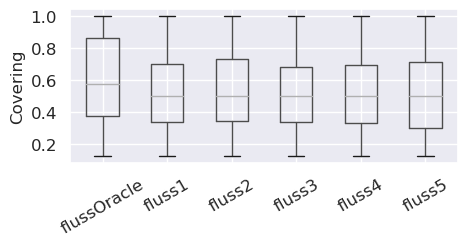

In [ ]:
fontsize = 12
_, ax = plt.subplots(figsize=(5,2))

df_scores.boxplot(ax=ax, rot=30)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

plt.savefig(f"./boxplot_unknown_fixed_m.png", bbox_inches="tight")